<a href="https://colab.research.google.com/github/Jagadishchandra17/Fashion-MNIST-Classification-using-CNN/blob/main/Fashion_MNIST_Classification_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Classification Using Convolutional Neural Networks**


## Data Preparation

In [ ]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

Import Non-PyTorch Modules


In [ ]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

## Creating a Dataset Class


Use the Compose function to compose the transforms


In [ ]:


IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [ ]:
# Define the image size
IMAGE_SIZE = 16

# Compose the transformations (resize and convert to tensor)
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize the image to 16x16
    transforms.ToTensor()                         # Convert image to tensor
])

# Load the FashionMNIST dataset with transformations
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=composed)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=composed)

# Create DataLoader to load the data in batches
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.09MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.1MB/s]


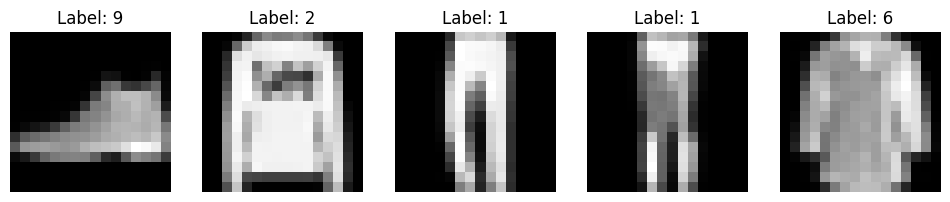

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the DataLoader
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Convert tensor to numpy for visualization
images = images.numpy()

# Plot a few images
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    axes[i].imshow(np.transpose(images[i], (1, 2, 0)), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')

plt.show()


Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. You will be asked to take a screenshot of several samples.


<b>Hint:</b>
<code>dsets.FashionMNIST(root= '.fashion/data', train=???, transform=composed,  download=True)</code>


In [ ]:
# Enter your code here
import torch
from torchvision import datasets, transforms

# Define the image size and transformation pipeline
IMAGE_SIZE = 16
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

# Create the training and validation datasets
dataset_train = datasets.FashionMNIST(
    root='./fashion/data',
    train=True,  # This will load the training dataset
    transform=composed,
    download=True
)

dataset_val = datasets.FashionMNIST(
    root='./fashion/data',
    train=False,  # This will load the validation dataset
    transform=composed,
    download=True
)

# Print the size of each dataset to ensure everything is loaded correctly
print(f'Training dataset size: {len(dataset_train)}')
print(f'Validation dataset size: {len(dataset_val)}')

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.97MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.55MB/s]

Training dataset size: 60000
Validation dataset size: 10000


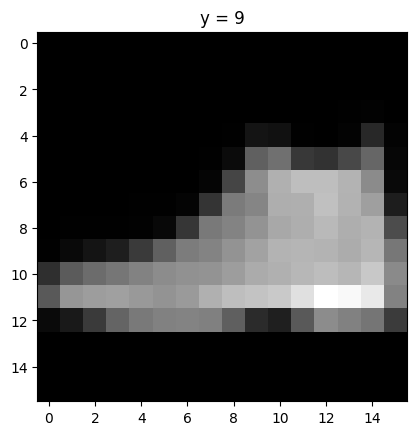

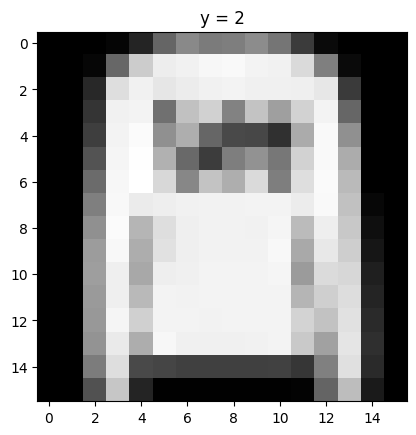

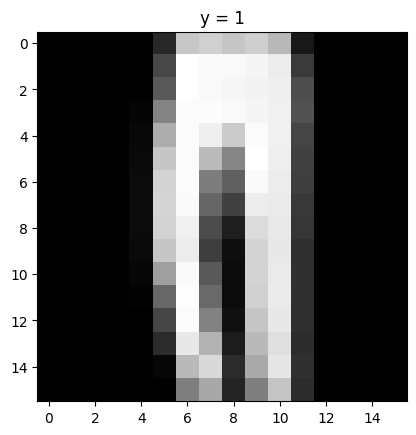

In [ ]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break


Creating a Convolutional Neural Network class using some constructors.


## Constructor  using Batch Norm


In [ ]:
class CNN_batch(nn.Module):

    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

train loader  and validation loader


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

Convolutional Neural Network object


In [ ]:
import torch.optim as optim

# Initialize the model, loss function (criterion), and optimizer
model = CNN_batch(out_1=16, out_2=32, number_of_classes=10)
criterion = nn.CrossEntropyLoss()  # Cross entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

Create the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. Make the optimizer use SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss


In [ ]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:  # Iterating through the training data
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)  # Pass the input through the model

        # Compute the loss
        loss = criterion(outputs, labels)  # Calculate the cross-entropy loss

        # Backpropagation
        loss.backward()  # Backpropagate the gradients
        optimizer.step()  # Update the model's weights using the optimizer

        running_loss += loss.item()  # Accumulate the loss for logging

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)  # Get the predicted class
        total += labels.size(0)  # Count the total number of samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

    # Print stats for each epoch
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

# After training, evaluate the model on the validation set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

validation_accuracy = 100 * correct / total
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Epoch [1/5], Train Loss: 0.4949, Train Accuracy: 84.81%
Epoch [2/5], Train Loss: 0.3461, Train Accuracy: 88.32%
Epoch [3/5], Train Loss: 0.3092, Train Accuracy: 89.36%
Epoch [4/5], Train Loss: 0.2864, Train Accuracy: 90.12%
Epoch [5/5], Train Loss: 0.2700, Train Accuracy: 90.60%
Validation Accuracy: 87.27%


## Training the model

In [ ]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)


## Visualization

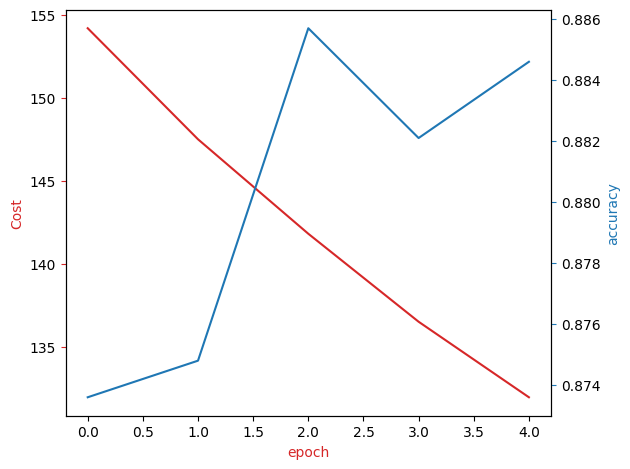

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

dataset: https://github.com/zalandoresearch/fashion-mnist
